# BikeShare: Did the number of casual users increase in 2012 compared to 2011?

## 1. Summary

## 2. Introduction

## 3. Method

## 4. Calculations

### 4.1 Setup the notebook

In [1]:
# import the packages, modules
from statsmodels.stats.weightstats import zconfint, ztest
from scipy.stats import norm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 4.2 Import the data

In [2]:
# import the data
df_bike = pd.read_csv("../data/bike_rental_daily.csv")

### 4.3 Wrangle the data

#### 4.3.1 Create a new DataFrame with only the columns of interest

In [3]:
df_processed = df_bike[["season", "yr", "workingday", "casual"]].copy(True)

#### 4.3.2 Filter DataFrame so it only contains the rows of interest

In [4]:
# filter on workingday=0
df_processed.query('workingday == 0', inplace=True)

# filter on season in Spring, Summer
df_processed.query('season in [2, 3]', inplace=True)

#### 4.3.3 Add description column that maps `yr` to `0=2011, 1=2012`

In [5]:
dict_yr ={0: '2011', 1: '2012'}
df_processed["yr desc"] = df_processed["yr"].replace(dict_yr)

#### 4.3.4 Create two new DataFrames: one for 2011, the other for 2012

In [6]:
df_2011 = df_processed.query('yr == 0')
df_2012 = df_processed.query('yr == 1')

### 4.4 Describe the data

In [7]:
df_2011[["casual"]].describe().T

,count,mean,std,min,25%,50%,75%,max
casual,56.0,1552.714286,545.715834,121.0,1285.75,1567.5,1880.25,3065.0


In [8]:
df_2012[["casual"]].describe().T

,count,mean,std,min,25%,50%,75%,max
casual,57.0,2212.035088,653.451331,120.0,1829.0,2345.0,2622.0,3410.0


### 4.5 Get the distribution of $\overline{X}_{2012} - \overline{X}_{2011}$

In [9]:
# get the mean difference
mu = df_2012["casual"].mean() - df_2011["casual"].mean()

# get nobs per year
n_2011 = df_2011["casual"].size
n_2012 = df_2012["casual"].size

# get the ese
var = (df_2011["casual"].var()/n_2011
       + df_2012["casual"].var()/n_2012)

ese = var**0.5

# declare the distribution
a_dist = norm(mu, ese)

### 4.6 Get a 95% $z$-interval of the mean difference

In [10]:
a_dist.interval(alpha=0.95)

(437.496822836128, 881.1447811738968)

### 4.7 Perform the hypothesis test

Calculate $Z = \dfrac{\overline{d}}{\text{ESE}}$.

In [12]:
# get test statistic
mu/ese

5.825542536156764

Test is one-sided, so calculate $P(Z > z)$.

In [13]:
# get p-value
norm().sf(mu/ese)

2.8463678537460443e-09

In [17]:
ztest(x1=df_2012["casual"], x2=df_2011["casual"], alternative="larger")

(5.816278092816442, 3.0086165352858375e-09)

## 5. Analysis

The distribution of the daily casual user count is shown below as comparative boxplots.

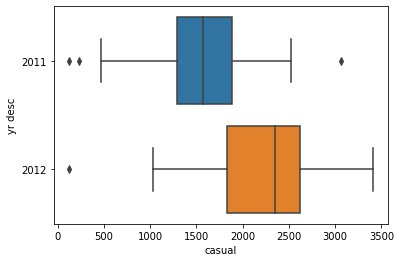

In [14]:
ax = sns.boxplot(data=df_processed, x="casual", y="yr desc")

--Describe the plot

The average casual daily total in 2011 was $\overline{X}_{2011}\simeq$ 1552.7, with a 95% confidence interval of (1409.8, 1695.6).
The average casual daily total in 2012 was $\overline{X}_{2012}\simeq$ 2212.0, with a 95% confidence interval of (2042.4, 2381.7)

## 6. Discussion